# XGBOOST

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__3.PREPROCESSING__

__4.SVR__
             
__5.RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll use the Support Vector Regressor method.

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,196.0,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,182.4,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,170.4,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,187.4,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

# Creating lists with the columns names
cols = X_train.columns

# Scaling the Xs
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

# Creating Dataframes
X_train = pd.DataFrame(X_train_sc, columns=cols)
X_test = pd.DataFrame(X_test_sc, columns=cols)

In [7]:
X_train.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.271292,-0.096338,1.668508,0.208378,-0.240801,-0.491120,-0.313034,0.077867,0.167429,0.104674,0.338603,-0.333879,-0.126548,-0.164616,0.832046,-0.243324,1.263284,-0.619932,0.150399,-0.733139,0.654095,0.671201,0.201664,-0.014851,0.752912,-0.490384,-0.268433,-0.505071,-0.568648,-0.796973,-0.800617,-0.376979
1,-0.278109,0.012097,-0.745916,-0.957016,-0.147741,0.268412,-0.313034,-0.820140,0.891139,0.952944,0.789650,0.035530,0.467398,0.414138,0.886482,-0.609210,0.213044,-0.188110,-0.717923,0.382208,-1.136868,-1.334959,1.095785,0.700492,-1.229780,-0.590300,0.164841,-0.214382,0.272010,-0.549130,-0.800617,-0.376979


In [8]:
X_test.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.535776,-0.482357,-0.811309,-0.695418,-0.423052,0.711498,-0.430235,-0.549236,-1.543721,-1.584673,-1.433122,-0.435373,-1.342823,-1.828754,-2.534765,-0.080493,-0.278430,0.236317,-0.256114,0.259405,0.096920,0.289552,-0.193297,-0.097635,-0.710776,1.043995,-0.071135,-0.340946,-1.173046,-1.041237,-0.805387,-0.43617
1,-0.691452,-0.723055,-0.835777,-0.166677,-0.658396,-0.803441,-0.430235,-0.171898,1.565093,1.453400,1.471794,-0.614601,1.305114,-0.870298,-2.331803,1.936349,1.072236,-0.582000,1.000732,-1.308176,1.098895,0.412094,-0.273350,-0.809507,0.825977,-0.518157,-0.324313,-0.361411,0.493556,1.455234,-0.805387,-0.43617


## 4. SVR

In [9]:
# Defining Grid for GridSearchCV

grid = {'kernel' : ['poly','sigmoid','linear', 'rbf'],
       'degree' : [2,3],
       'gamma' : [0.01, 'scale'],
       'coef0' : [0.01, 0.05, 0.1],
       'C' : [0.5, 1, 2],
       'epsilon' : [0.01, 0.1, 0.2],
       'shrinking' : [True, False],
       'max_iter' : [-1]}

In [10]:
# Instantiating GridSearchCV 

SVR_search = GridSearchCV(SVR(), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1 ,verbose = 1)

In [11]:
# Searching for the best parameters 

CV_SVR_results = SVR_search.fit(X_train, Y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [12]:
# Displaying the best parameters 

SVR_Best_Parameters = pd.DataFrame(CV_SVR_results.best_params_,
                                        index = ['Best Support Vector Regression Parameters'])

SVR_Best_Parameters = SVR_Best_Parameters.transpose()
SVR_Best_Parameters

,Best Support Vector Regression Parameters
C,2
coef0,0.01
degree,2
epsilon,0.1
gamma,0.01
kernel,linear
max_iter,-1
shrinking,True


In [13]:
# Storing the values of the best parameters

best_kernel = CV_SVR_results.best_params_['kernel']
best_degree = CV_SVR_results.best_params_['degree']
best_gamma = CV_SVR_results.best_params_['gamma']
best_coef0 = CV_SVR_results.best_params_['coef0']
best_C = CV_SVR_results.best_params_['C']
best_epsilon = CV_SVR_results.best_params_['epsilon']
best_shrinking = CV_SVR_results.best_params_['shrinking']
best_max_iter = CV_SVR_results.best_params_['max_iter']

In [14]:
# Instantiating the best model

SVRModel = SVR(kernel = best_kernel,
              degree = best_degree,
              gamma = best_gamma,
              coef0 = best_coef0,
              C = best_C,
              epsilon = best_epsilon,
              shrinking = best_shrinking,
              max_iter = best_max_iter).fit(X_train,Y_train)

In [15]:
# Getting the R^2

SVR_R2 = np.round(SVRModel.score(X_train, Y_train),3)

In [16]:
# Getting predictions and training MSE 

SVRPredictions = SVRModel.predict(X_train)

SVR_Training_MSE = np.round(mean_squared_error(Y_train, SVRPredictions),2)

In [17]:
# Getting kfold MSE 

svr_cv_MSE = round(np.mean(cross_val_score(SVRModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)


In [18]:
# Getting predictions and test MSE 

SVR_predictions = SVRModel.predict(X_test)
SVR_Test_MSE = round(mean_squared_error(Y_test, SVR_predictions), 2)

In [19]:
# Dictionary that holds the performance metrics 

dict1 = {'SVR': (np.round(SVR_R2,3), SVR_Training_MSE,
                                            svr_cv_MSE, SVR_Test_MSE )}

In [20]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

## 5. RESULTS

__Aggragated Results__

In [21]:
# Displaying the metrics

Evaluation_df

,SVR
R^2,0.505
Training_MSE,357.680
Training_MSE (KFold),367.700
Test_MSE,309.220


__Residuals's Plots__

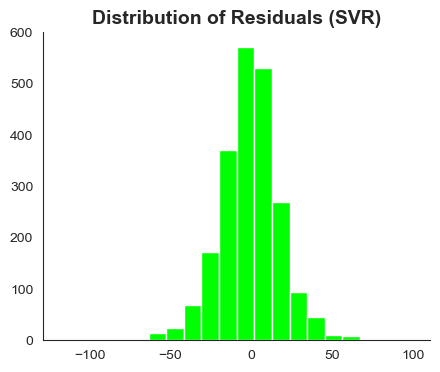

In [22]:
residuals_svr = SVRPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_svr, bins = 20, color = "lime")
    
plt.title(label = "Distribution of Residuals (SVR)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

SVR exhibits exceptionally low variance between training and cross-validated errors, showcasing excellent overall performance.

In [23]:
Evaluation_df.to_csv(r'SVR_Results.csv', index=True, 
                                              index_label= 'Metrics')